##  Model Selection and Training

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,confusion_matrix
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV
import scipy.stats as stats

In [400]:
x_train_prep = pd.read_csv('/kaggle/working/x_train_prep.csv')
x_test_prep = pd.read_csv('/kaggle/working/x_test_prep.csv')
y_train = pd.read_csv('/kaggle/working/y_train.csv')
y_test = pd.read_csv('/kaggle/working/y_test.csv')

In [402]:
models = {
    'LogisticRegression': LogisticRegression(penalty = 'l2' , solver='lbfgs'),
    'SVC' : SVC(C = 1.0 , kernel= 'rbf' , gamma= 'scale'),
    'DecisionTreeClassifier' : DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, criterion='gini'),
    'RandomForestClassifier' : RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=2, criterion='gini'),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2),
    'GaussianNB' : GaussianNB(var_smoothing=1e-9)
}

In [403]:
warnings.filterwarnings('ignore')
model_results = {}

for model_name, model in models.items():
    scores = cross_val_score(model, x_train_prep, y_train, cv=3, scoring='accuracy')
    model_results[model_name] = scores.mean()
    
print("\nFinal Results:")
for model_name, score in model_results.items():
    print(f'{model_name}: {score:.4f}')


Final Results:
LogisticRegression: 0.9077
SVC: 0.9271
DecisionTreeClassifier: 0.9428
RandomForestClassifier: 0.9433
KNeighborsClassifier: 0.9108
GaussianNB: 0.6940


In [404]:
sorted_results = sorted(model_results.items(), key=lambda x: x[1], reverse=True)
top_three_models = sorted_results[:3]
for model_name, score in top_three_models:
    print(f'{model_name}: {score:.4f}')

RandomForestClassifier: 0.9433
DecisionTreeClassifier: 0.9428
SVC: 0.9271


## Model Evaluation


Model: RandomForestClassifier
Accuracy Score: 0.9433

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10057
           1       0.93      0.66      0.77      1670

    accuracy                           0.94     11727
   macro avg       0.94      0.83      0.87     11727
weighted avg       0.94      0.94      0.94     11727



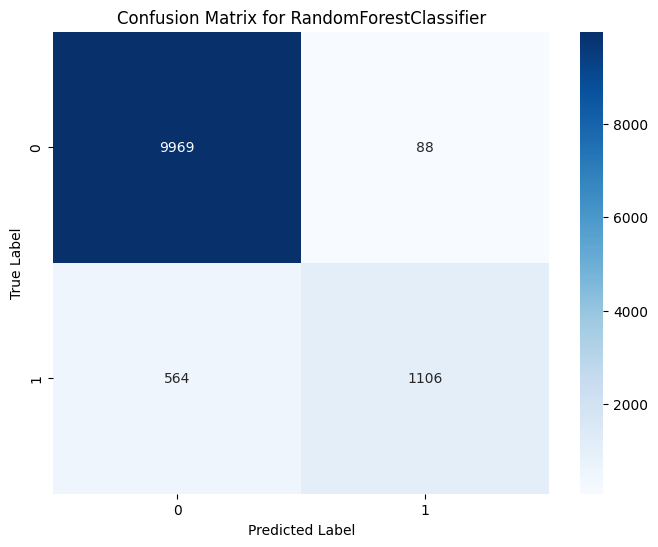


Model: DecisionTreeClassifier
Accuracy Score: 0.9428

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10057
           1       0.91      0.69      0.78      1670

    accuracy                           0.95     11727
   macro avg       0.93      0.84      0.87     11727
weighted avg       0.94      0.95      0.94     11727



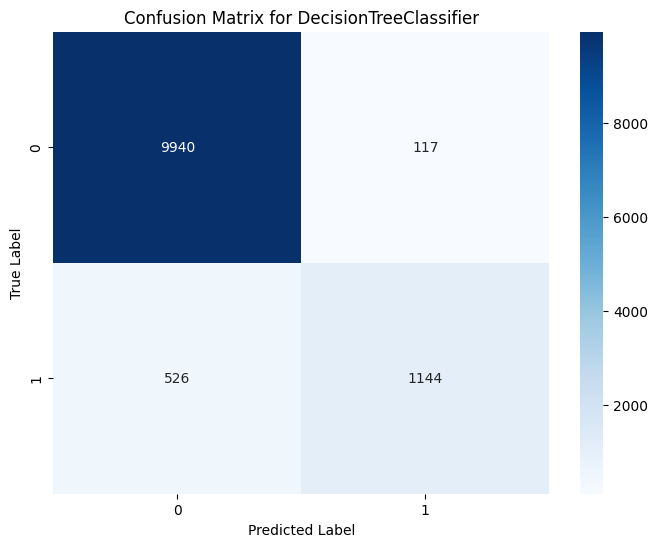


Model: SVC
Accuracy Score: 0.9271

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10057
           1       0.88      0.59      0.70      1670

    accuracy                           0.93     11727
   macro avg       0.91      0.79      0.83     11727
weighted avg       0.93      0.93      0.92     11727



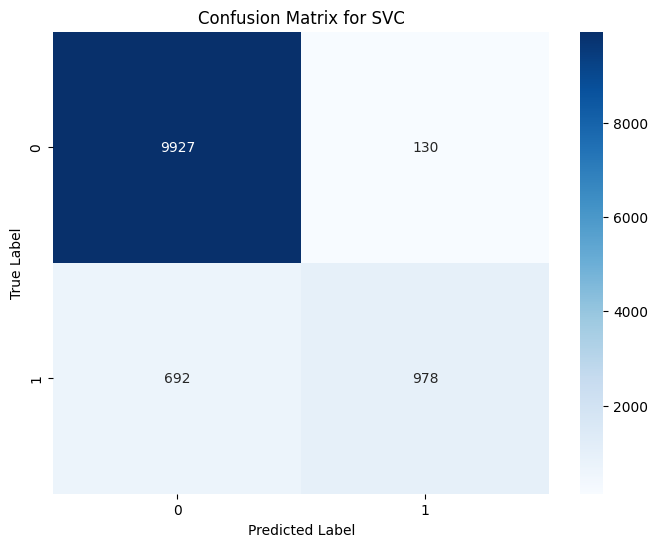

In [405]:
for model_name, score in top_three_models:
    print(f"\nModel: {model_name}")
    print(f"Accuracy Score: {score:.4f}")

    model = models[model_name]
    model.fit(x_train_prep, y_train)
    
    y_pred = model.predict(x_test_prep)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()